**PROJECT TITLE** --
# **Sales Performance Analysis Using Python**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns




In [ ]:
sales2= pd.read_csv('/content/Sales.csv', parse_dates=['Date'])

In [ ]:
sales2.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


In [ ]:
sales2.tail()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
113031,2016-04-12,12,April,2016,41,Adults (35-64),M,United Kingdom,England,Clothing,Vests,"Classic Vest, S",3,24,64,112,72,184
113032,2014-04-02,2,April,2014,18,Youth (<25),M,Australia,Queensland,Clothing,Vests,"Classic Vest, M",22,24,64,655,528,1183
113033,2016-04-02,2,April,2016,18,Youth (<25),M,Australia,Queensland,Clothing,Vests,"Classic Vest, M",22,24,64,655,528,1183
113034,2014-03-04,4,March,2014,37,Adults (35-64),F,France,Seine (Paris),Clothing,Vests,"Classic Vest, L",24,24,64,684,576,1260
113035,2016-03-04,4,March,2016,37,Adults (35-64),F,France,Seine (Paris),Clothing,Vests,"Classic Vest, L",23,24,64,655,552,1207


In [ ]:
sales2.columns

Index(['Date', 'Day', 'Month', 'Year', 'Customer_Age', 'Age_Group',
       'Customer_Gender', 'Country', 'State', 'Product_Category',
       'Sub_Category', 'Product', 'Order_Quantity', 'Unit_Cost', 'Unit_Price',
       'Profit', 'Cost', 'Revenue'],
      dtype='object')

**DATA CLEANING**

We are checking the imformation of the data set, is there is any null values, and duplicates

In [ ]:
print(sales2.info())
print("\n")

print(sales2.isnull().sum())
print("\n")

print("Duplicates:", sales2.duplicated().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Date              113036 non-null  datetime64[ns]
 1   Day               113036 non-null  int64         
 2   Month             113036 non-null  object        
 3   Year              113036 non-null  int64         
 4   Customer_Age      113036 non-null  int64         
 5   Age_Group         113036 non-null  object        
 6   Customer_Gender   113036 non-null  object        
 7   Country           113036 non-null  object        
 8   State             113036 non-null  object        
 9   Product_Category  113036 non-null  object        
 10  Sub_Category      113036 non-null  object        
 11  Product           113036 non-null  object        
 12  Order_Quantity    113036 non-null  int64         
 13  Unit_Cost         113036 non-null  int64         
 14  Unit

In [ ]:
sales2 = sales2.dropna()

In [ ]:
sales2['State'] = sales2['State'].fillna('Unknown')


We can see there are no null values in our dataset.

So, now we will Convert Date Column(in string) to Proper Datetime

In [ ]:
sales2['Calculated_Dates'] = pd.to_datetime(sales2['Year'].astype(str) + "-" +                 #pd.to_datetime  #.astypr(str)
                    sales2['Month'].astype(str) + "-" +
                    sales2['Day'].astype(str))
display(sales2['Calculated_Dates'])

,Calculated_Dates
0,2013-11-26
1,2015-11-26
2,2014-03-23
3,2016-03-23
4,2014-05-15
...,...
113031,2016-04-12
113032,2014-04-02
113033,2016-04-02
113034,2014-03-04


In [ ]:
sales2['Date'] = pd.to_datetime(sales2['Calculated_Dates'], errors='coerce')


In [ ]:
  ##This code does not do any changes to the dataset. It is just to view the coloumns.

sales2['Year'] = sales2['Date'].dt.year
sales2['Month'] = sales2['Date'].dt.month_name()
sales2['Day'] = sales2['Date'].dt.day
sales2.columns


Index(['Date', 'Day', 'Month', 'Year', 'Customer_Age', 'Age_Group',
       'Customer_Gender', 'Country', 'State', 'Product_Category',
       'Sub_Category', 'Product', 'Order_Quantity', 'Unit_Cost', 'Unit_Price',
       'Profit', 'Cost', 'Revenue', 'Calculated_Dates'],
      dtype='object')

Now we will converts the columns to numeric data types, coercing any invalid values into NaN.

In [ ]:
col_numeric = ['Order_Quantity','Unit_Cost','Unit_Price','Profit','Cost','Revenue']
sales2[col_numeric] = sales2[col_numeric].apply(pd.to_numeric, errors='coerce')

In [ ]:
sales2[col_numeric].dtypes


,0
Order_Quantity,int64
Unit_Cost,int64
Unit_Price,int64
Profit,int64
Cost,int64
Revenue,int64


We will now standardize text formats across the dataset to ensure consistency and improve data quality.

In [ ]:
sales2['Product_Category'] = sales2['Product_Category'].str.title()              #.str.title()
sales2['Country'] = sales2['Country'].str.title()
sales2['Sub_Category'] = sales2['Sub_Category'].str.title()

sales2['Customer_Gender'] = sales2['Customer_Gender'].str.upper()                #.str.upper()



In [ ]:
sales2['Product_Category'].unique()


array(['Accessories', 'Clothing', 'Bikes'], dtype=object)

In [ ]:
sales2['Sub_Category'].unique()


array(['Bike Racks', 'Bike Stands', 'Bottles And Cages', 'Caps',
       'Cleaners', 'Fenders', 'Gloves', 'Helmets', 'Hydration Packs',
       'Jerseys', 'Mountain Bikes', 'Road Bikes', 'Shorts', 'Socks',
       'Tires And Tubes', 'Touring Bikes', 'Vests'], dtype=object)

Validated and corrected the Revenue column by recalculating revenue values and updating any discrepancies to ensure data accuracy

In [ ]:
sales2['Calculated_Revenue'] = sales2['Profit'] + sales2['Cost']
sales2['Revenue'] = sales2['Calculated_Revenue']

print(sales2['Revenue'].sum())
print('\n')

print(sales2['Revenue'].mean())
print('\n')

display(sales2['Revenue'])


85271008


754.3703598853463




,Revenue
0,950
1,950
2,2401
3,2088
4,418
...,...
113031,184
113032,1183
113033,1183
113034,1260


Grouped ages into four categories (Youth, Young Adult, Adult, Senior) using custom age ranges

In [ ]:
sales2['Age_Group'] = pd.cut(sales2['Customer_Age'], bins=[1,25,45,65, 100], labels=['Child', 'Young', 'Adult', 'Seniors'])
display(sales2['Age_Group'])

,Age_Group
0,Child
1,Child
2,Adult
3,Adult
4,Adult
...,...
113031,Young
113032,Child
113033,Child
113034,Young


In [ ]:
sales2.head()


,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Calculated_Dates,Calculated_Revenue
0,2013-11-26,26,November,2013,19,Child,M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950,2013-11-26,950
1,2015-11-26,26,November,2015,19,Child,M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950,2015-11-26,950
2,2014-03-23,23,March,2014,49,Adult,M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401,2014-03-23,2401
3,2016-03-23,23,March,2016,49,Adult,M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088,2016-03-23,2088
4,2014-05-15,15,May,2014,47,Adult,F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418,2014-05-15,418


# FEATURE ENGINEERING FOR SALES DATASET ---


1.   Total Cost (Unit_Cost × Order_Quantity)
2.   Total Revenue (Unit_Price × Order_Quantity)
3.   Margin (Profit as % of Revenue)
4.   Profitability category: High / Medium / Low
5.   Weekend or Weekday
6.   Revenue per Unit (useful for outlier detection)

In [ ]:
sales2['Total_Cost'] = sales2['Unit_Cost'] * sales2['Order_Quantity']
display(sales2['Total_Cost'])




,Total_Cost
0,360
1,360
2,1035
3,900
4,180
...,...
113031,72
113032,528
113033,528
113034,576


In [ ]:
sales2['Total_Revenue'] = sales2['Unit_Price'] * sales2['Order_Quantity']
display(sales2['Total_Revenue'])

,Total_Revenue
0,960
1,960
2,2760
3,2400
4,480
...,...
113031,192
113032,1408
113033,1408
113034,1536


In [ ]:
sales2['Profit_Margin_%'] = (sales2['Profit'] / sales2['Revenue']) * 100

sales2['Profit_Margin_%'].round(2)

display(sales2['Profit_Margin_%'].astype(int))


,Profit_Margin_%
0,62
1,62
2,56
3,56
4,56
...,...
113031,60
113032,55
113033,55
113034,54


In [ ]:
sales2['Profit_Category'] = pd.cut(sales2['Profit'], bins=[-999999, 0, 500, 2000, 1000000],
                                                     labels=['Loss', 'Low Profit', 'Medium Profit', 'High Profit'])

display(sales2['Profit_Category'])





,Profit_Category
0,Medium Profit
1,Medium Profit
2,Medium Profit
3,Medium Profit
4,Low Profit
...,...
113031,Low Profit
113032,Medium Profit
113033,Medium Profit
113034,Medium Profit


In [ ]:
sales2['Is_Weekend'] = sales2['Date'].dt.day_name().isin(['Saturday', 'Sunday'])
display(sales2['Is_Weekend'])


,Is_Weekend
0,False
1,False
2,True
3,False
4,False
...,...
113031,False
113032,False
113033,True
113034,False


In [ ]:
sales2['Revenue_per_Unit'] = sales2['Revenue'] / sales2['Order_Quantity']

display(sales2['Revenue_per_Unit'].astype(int))

,Revenue_per_Unit
0,118
1,118
2,104
3,104
4,104
...,...
113031,61
113032,53
113033,53
113034,52


In [ ]:
sales2.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,...,Profit,Cost,Revenue,Calculated_Revenue,Total_Cost,Profit_Margin_%,Total_Revenue,Profit_Category,Is_Weekend,Revenue_per_Unit
0,2013-11-26,26,November,2013,19,Child,M,Canada,British Columbia,Accessories,...,590,360,950,950,360,62.105263,960,Medium Profit,False,118.750000
1,2015-11-26,26,November,2015,19,Child,M,Canada,British Columbia,Accessories,...,590,360,950,950,360,62.105263,960,Medium Profit,False,118.750000
2,2014-03-23,23,March,2014,49,Adult,M,Australia,New South Wales,Accessories,...,1366,1035,2401,2401,1035,56.892961,2760,Medium Profit,True,104.391304
3,2016-03-23,23,March,2016,49,Adult,M,Australia,New South Wales,Accessories,...,1188,900,2088,2088,900,56.896552,2400,Medium Profit,False,104.400000
4,2014-05-15,15,May,2014,47,Adult,F,Australia,New South Wales,Accessories,...,238,180,418,418,180,56.937799,480,Low Profit,False,104.500000


In [ ]:
sales2.columns

Index(['Date', 'Day', 'Month', 'Year', 'Customer_Age', 'Age_Group',
       'Customer_Gender', 'Country', 'State', 'Product_Category',
       'Sub_Category', 'Product', 'Order_Quantity', 'Unit_Cost', 'Unit_Price',
       'Profit', 'Cost', 'Revenue', 'Calculated_Dates', 'Calculated_Revenue',
       'Total_Cost', 'Total_Revenue', 'Profit_Margin_%', 'Profit_Category',
       'Is_Weekend', 'Revenue_per_Unit'],
      dtype='object')

We aim to identify which age group contributes the highest sales.

In [ ]:
sales2['Customer_Age'].mean()

np.float64(35.91921157861212)

<Axes: xlabel='Age_Group'>

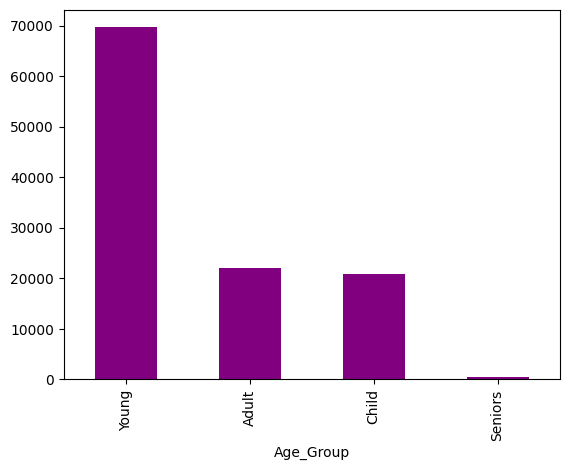

In [ ]:
sales2['Age_Group'].value_counts().plot(kind='bar', color= 'purple')


<Axes: xlabel='Age_Group', ylabel='count'>

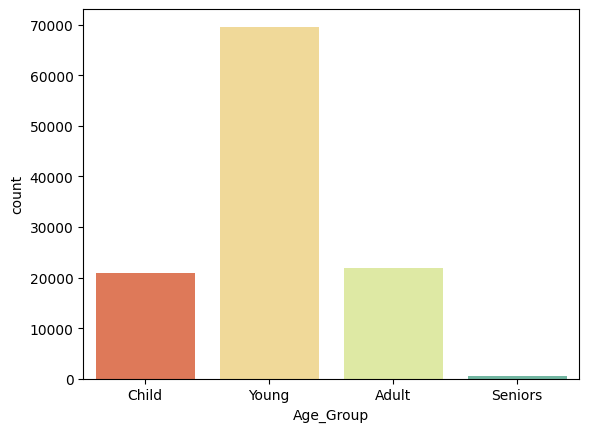

In [ ]:
bins = [0, 25, 45, 65, 100]
labels = ['Child (0–25 yrs)', 'Young (25–45 yrs)', 'Adult (45–65 yrs)', 'Senior (65+ yrs)']

sns.countplot(data=sales2, x='Age_Group', hue='Age_Group', palette='Spectral', legend=False)


To analyze how different customer age groups influence the company’s revenue.

/tmp/ipython-input-3608616213.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sales2.groupby('Age_Group')['Revenue'].sum().plot(kind='bar', color='purple'); plt.title('Revenue by Age Group'); plt.show()


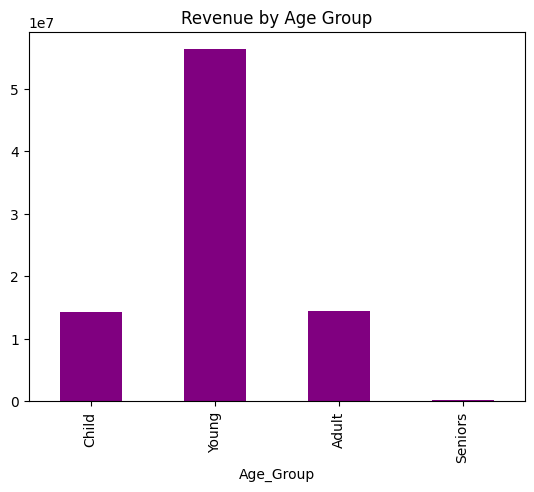

In [ ]:
sales2.groupby('Age_Group')['Revenue'].sum().plot(kind='bar', color='purple'); plt.title('Revenue by Age Group'); plt.show()


/tmp/ipython-input-2267959098.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sales2, x='Age_Group', y='Revenue', estimator=sum, palette="pastel")


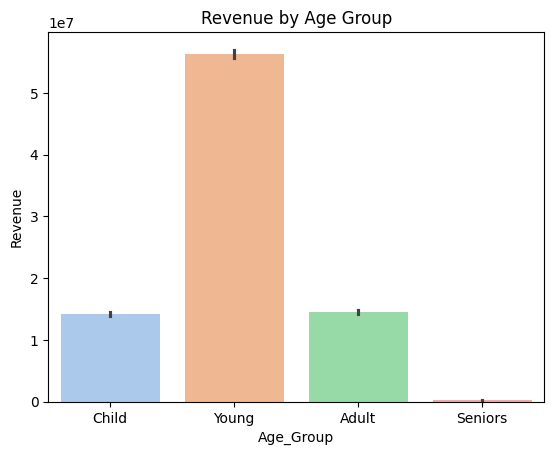

In [ ]:
sns.barplot(data=sales2, x='Age_Group', y='Revenue', estimator=sum, palette="pastel")
plt.title('Revenue by Age Group')
plt.show()


This analysis aims to identify which customer age group generates the highest revenue across different countries.


<Axes: xlabel='Country'>

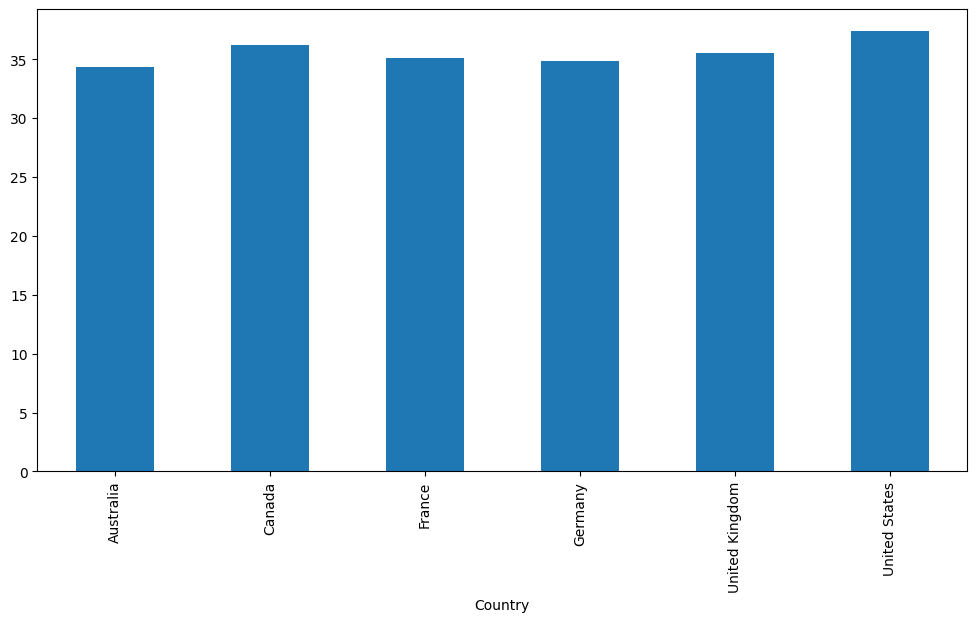

In [ ]:
sales2.groupby('Country')['Customer_Age'].mean().plot(kind='bar', figsize=(12,6))


# **Findings:**

“The age-group analysis shows that customers between 25–45 years contribute the highest sales, making them the most profitable segment for the business. Customers aged 45–65 years follow as the second most valuable group in overall revenue generation.”

We proceed by evaluating the order quantity, profit, profit_category and Revenue to understand purchasing patterns.




/tmp/ipython-input-1919760614.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sales2, x='Product_Category', y='Order_Quantity', estimator = 'sum',  palette='pastel')


<Axes: xlabel='Product_Category', ylabel='Order_Quantity'>

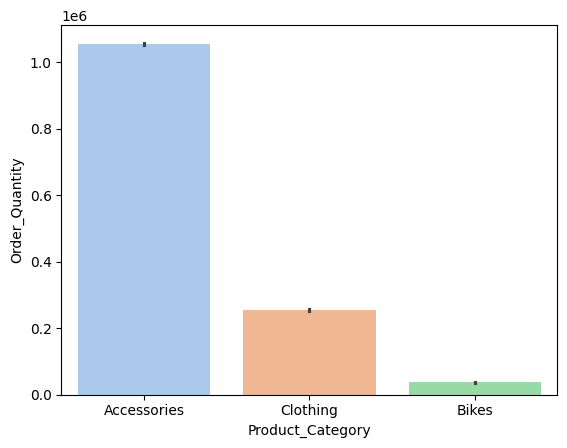

In [ ]:
sns.barplot(data=sales2, x='Product_Category', y='Order_Quantity', estimator = 'sum',  palette='pastel')

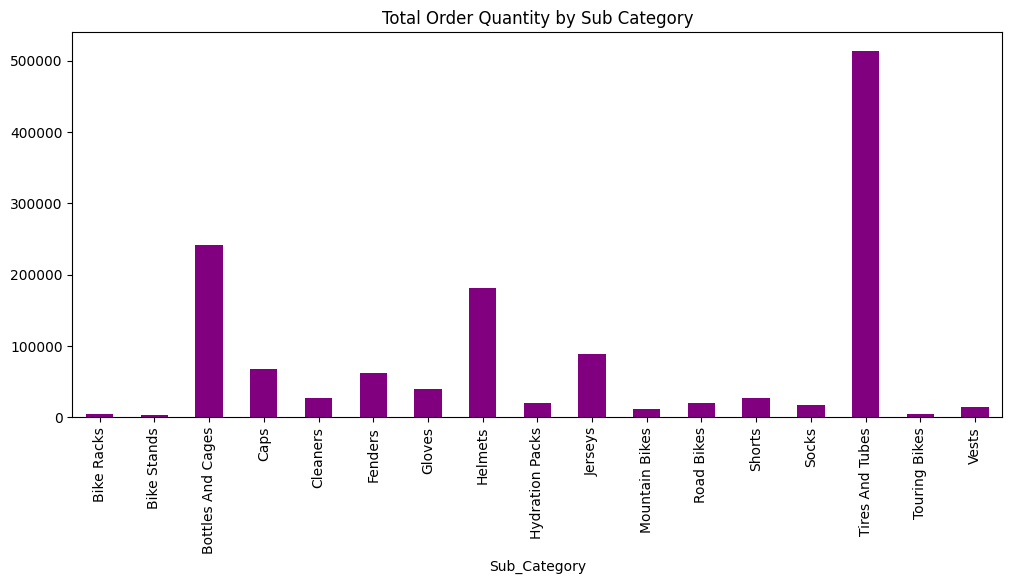

In [ ]:
sales2.groupby('Sub_Category')['Order_Quantity'].sum().plot(kind='bar', color='purple', figsize=(12,5));plt.title('Total Order Quantity by Sub Category')
plt.show()

1. **Product Demand Insights**

  * Accessories are the most demanded product category overall.

  * Within Accessories, Tires & Tubes show the highest order quantity across all sub-categories.

  * Bikes and Clothing have comparatively lower demand volume.


# Profitability

Now we will eavaluate the profit_margin% and profit_category

Profit_Margin%

/tmp/ipython-input-4021742053.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sales2, x='Product_Category', y='Profit_Margin_%', estimator = 'mean' ,palette='pastel')


<Axes: xlabel='Product_Category', ylabel='Profit_Margin_%'>

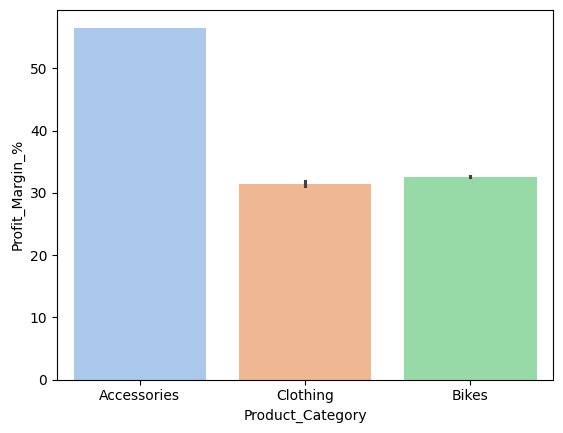

In [ ]:
sns.barplot(data=sales2, x='Product_Category', y='Profit_Margin_%', estimator = 'mean' ,palette='pastel')

<Axes: xlabel='Sub_Category'>

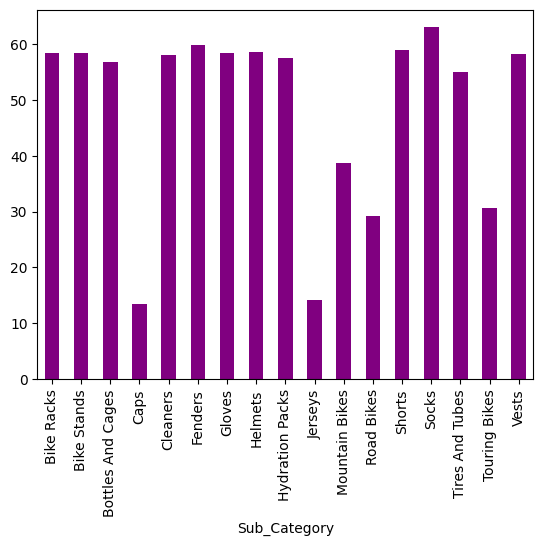

In [ ]:
sales2.groupby('Sub_Category')['Profit_Margin_%'].mean().plot(kind= 'bar', color= 'purple')

2. **Profitability Insights**

  * Accessories show the highest profit margin %.


  * Items like Socks, Shorts, and Vests have the highest profit margins within sub-categories.



Profit_Category

/tmp/ipython-input-3573818941.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=sales2, x='Profit_Category',  palette='pastel'); plt.title('Distribution of Profit Categories')


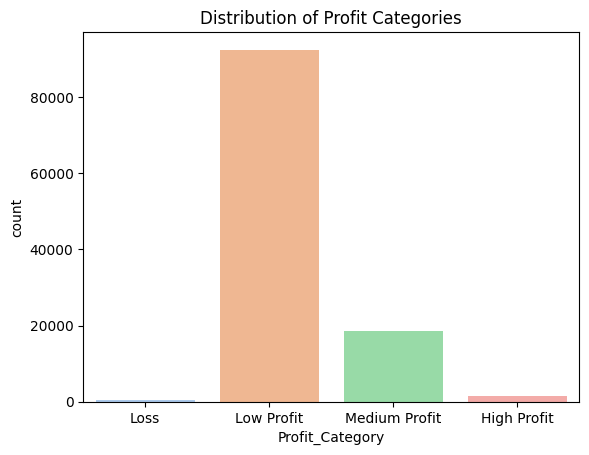

In [ ]:
sns.countplot(data=sales2, x='Profit_Category',  palette='pastel'); plt.title('Distribution of Profit Categories')
plt.show()

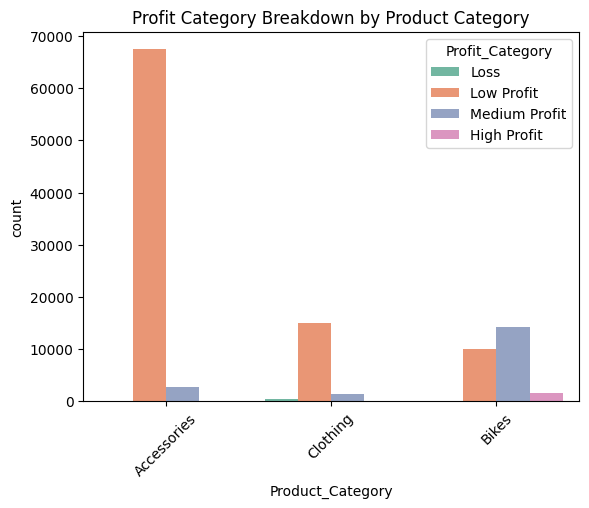

In [ ]:
sns.countplot(data=sales2, x='Product_Category', hue='Profit_Category', palette='Set2'); plt.title('Profit Category Breakdown by Product Category')
plt.xticks(rotation=45)
plt.show()

<Axes: ylabel='Sub_Category,Profit_Category'>

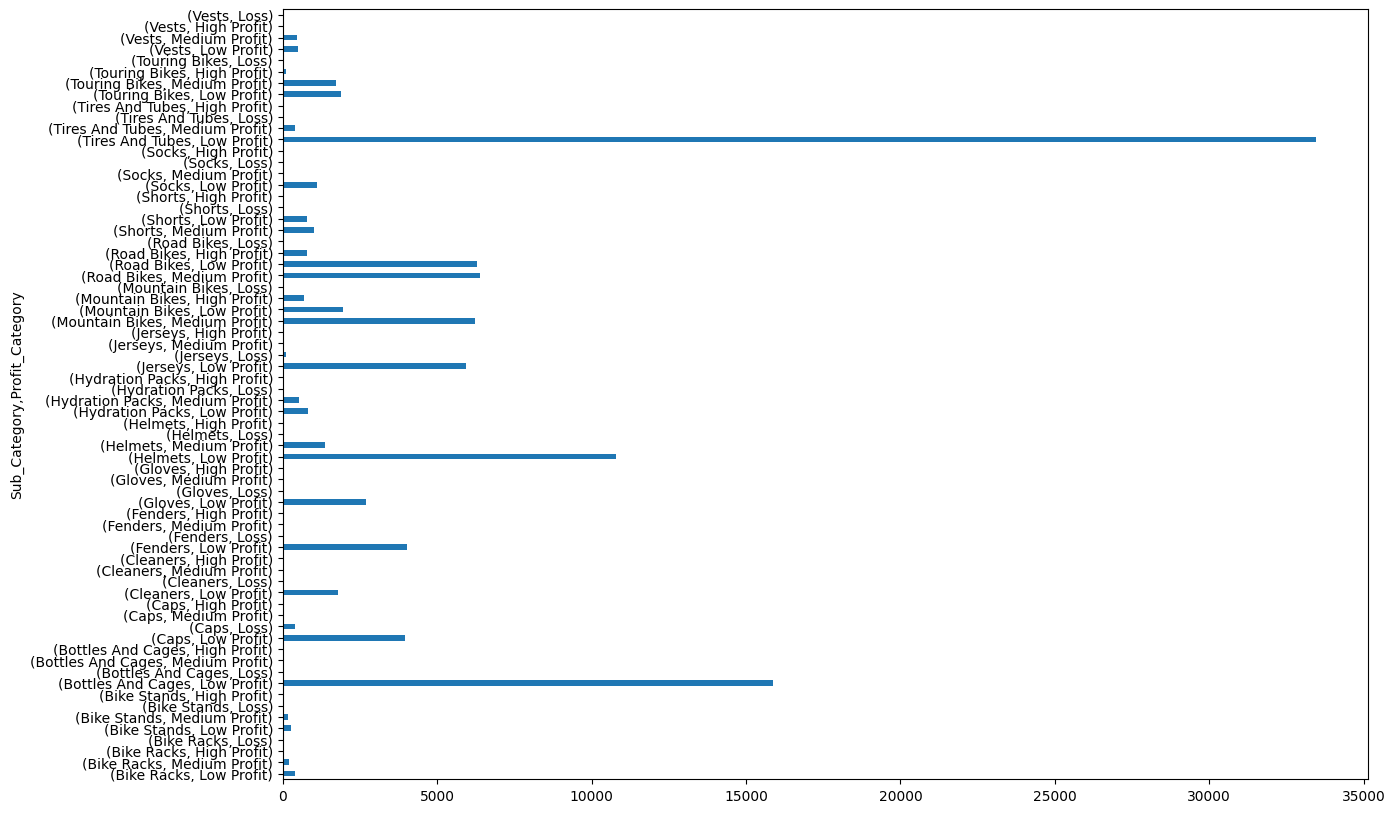

In [ ]:
sales2.groupby('Sub_Category')['Profit_Category'].value_counts().plot(kind= 'barh', figsize= (14,10))

3.  **Profit Category Distribution**

  * The majority of products fall into Low and Medium Profit categories.

   * Accessories show the highest profit margin % but generate lower total profit because of lower revenue per unit.


  * Bikes emerge as to fall on high profit category  despite having lower demand than Accessories.Only the Bike segment contributes significantly to the High Profit category.



 Pricing & Revenue Efficiency

/tmp/ipython-input-3684785420.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sales2, x='Product_Category', y='Revenue_per_Unit', palette='pastel'); plt.title('Average Revenue per Unit by Product Category')


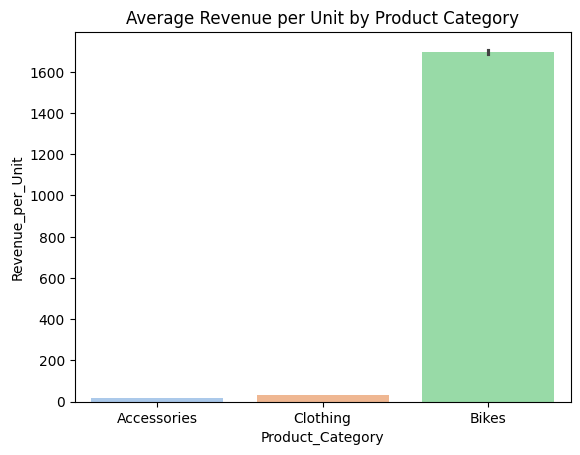

In [ ]:
sns.barplot(data=sales2, x='Product_Category', y='Revenue_per_Unit', palette='pastel'); plt.title('Average Revenue per Unit by Product Category')
plt.show()


<Axes: xlabel='Sub_Category'>

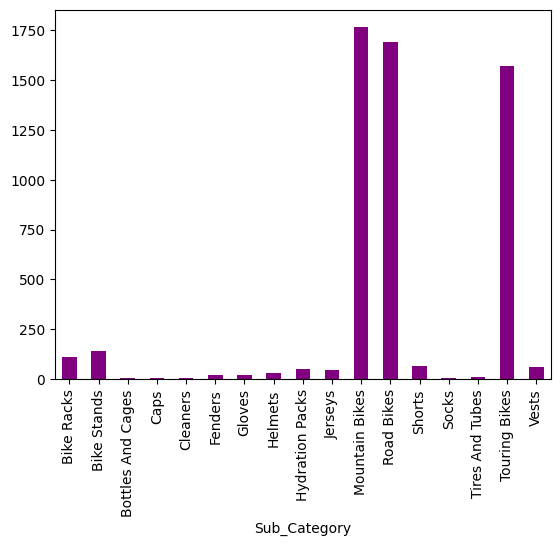

In [ ]:
sales2.groupby('Sub_Category')['Revenue_per_Unit'].mean().plot(kind= 'bar', color= 'purple')

4. **Revenue Efficiency Findings**

  * Bikes have the highest Revenue per Unit, making them the strongest contributor to revenue despite lower sales volume.

  * Among sub-categories, Mountain Bikes, Road Bikes, and Touring Bikes generate the highest revenue per unit.

  * Accessories generate high volume but lower revenue efficiency per unit.

# Overall FINDINGS

1. **Product Category & Sub-Category Insights**
     * The Accessories category shows the highest customer demand.
     * Within Accessories, the Tires and Tubes sub-category has the highest demand  among all sub-categories.

2. **Profit Margin Analysis**
     * Accessories have the highest profit margin, followed by Bikes and Clothing.
     * Items like Socks, Shorts, and Vests have the highest profit margins within sub-categories.
     * However, despite the high profit margin in Accessories, the overall profit contribution from this category is low due to lower selling price / lower revenue per unit.
     * Bikes emerge as the most profitable product segment overall despite having lower demand than Accessories.

3. **Revenue Per Unit Insights**
     * The Bikes category generates the highest revenue per unit sold compared to Accessories and Clothing.
     * Within sub-categories, Mountain Bikes, Road Bikes, and Touring Bikes have the highest revenue per unit.

# **Overall, although Accessories show the highest demand, the Bikes segment delivers the greatest profitability and highest revenue per unit, making it the most valuable product category for the business.**

**Monthly sales trends**
1. Monthly sales value_counts
2. Monthly Revenue
3. Monthly Sales Revenue Trend by Product Category

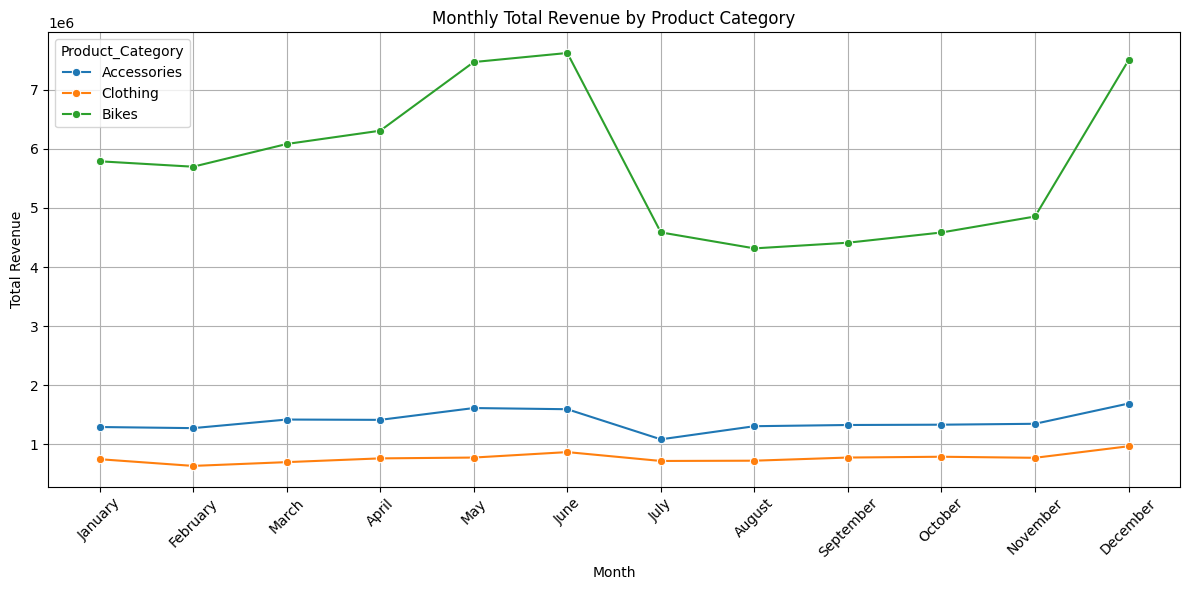

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure months are sorted in correct calendar order
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

sales2['Month'] = pd.Categorical(sales2['Month'], categories=month_order, ordered=True)

plt.figure(figsize=(12,6))
sns.lineplot(
    data=sales2,
    x='Month',
    y='Total_Revenue',
    hue='Product_Category',
    estimator='sum',
    errorbar=None,
    marker='o',
    palette='tab10'
)

plt.title('Monthly Total Revenue by Product Category')
plt.ylabel('Total Revenue')
plt.xlabel('Month')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


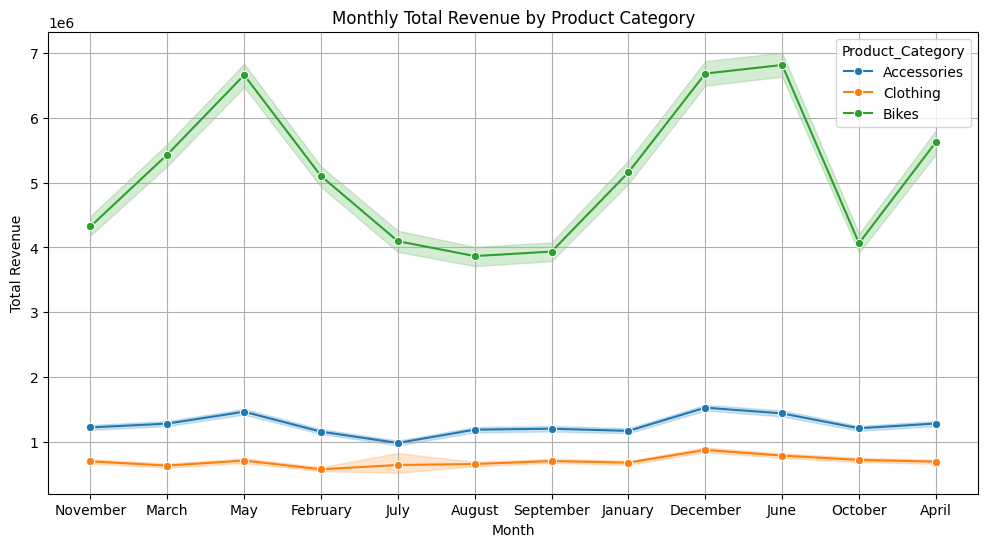

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.lineplot(
    data=sales2,
    x='Month',
    y='Revenue',
    hue='Product_Category',
    estimator='sum',
    marker='o',
    palette='tab10'
)

plt.title('Monthly Total Revenue by Product Category')
plt.ylabel('Total Revenue')
plt.xlabel('Month')
plt.grid(True)
plt.show()

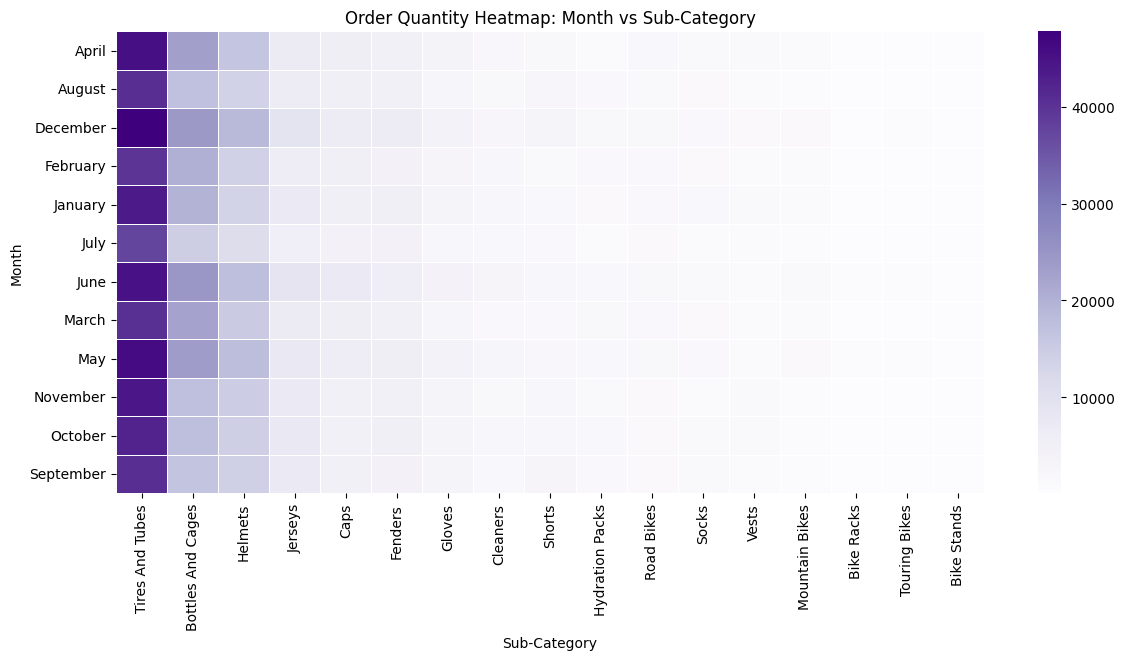

In [ ]:
# Sort subcategories by total order quantity
sorted_subcats = sales2.groupby('Sub_Category')['Order_Quantity'].sum().sort_values(ascending=False).index


# Create pivot table
pivot = (sales2
         .groupby(['Month','Sub_Category'])['Order_Quantity']
         .sum()
         .unstack()
         [sorted_subcats])   # reorder columns

plt.figure(figsize=(14,6))
sns.heatmap(
    pivot,
    cmap='Purples',
    linewidths=.5
)

plt.title('Order Quantity Heatmap: Month vs Sub-Category')
plt.xlabel('Sub-Category')
plt.ylabel('Month')
plt.show()

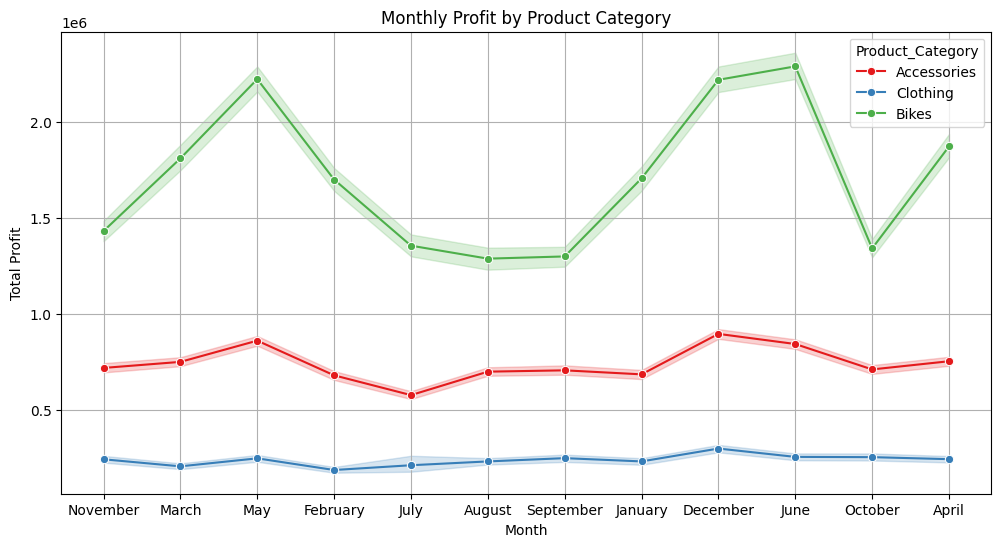

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.lineplot(
    data=sales2,
    x='Month',
    y='Profit',
    hue='Product_Category',
    estimator='sum',
    marker='o',
    palette='Set1'
)

plt.title('Monthly Profit by Product Category')
plt.ylabel('Total Profit')
plt.xlabel('Month')
plt.grid(True)
plt.show()

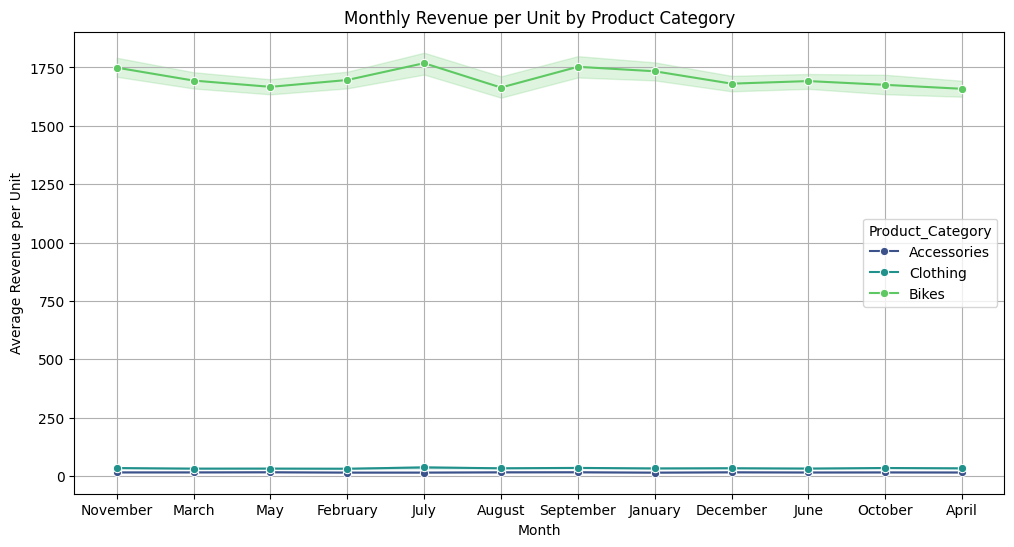

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.lineplot(
    data=sales2,
    x='Month',
    y='Revenue_per_Unit',
    hue='Product_Category',
    estimator='mean',     # Revenue per unit is a rate → mean is correct
    marker='o',
    palette='viridis'
)

plt.title('Monthly Revenue per Unit by Product Category')
plt.ylabel('Average Revenue per Unit')
plt.xlabel('Month')
plt.grid(True)
plt.show()

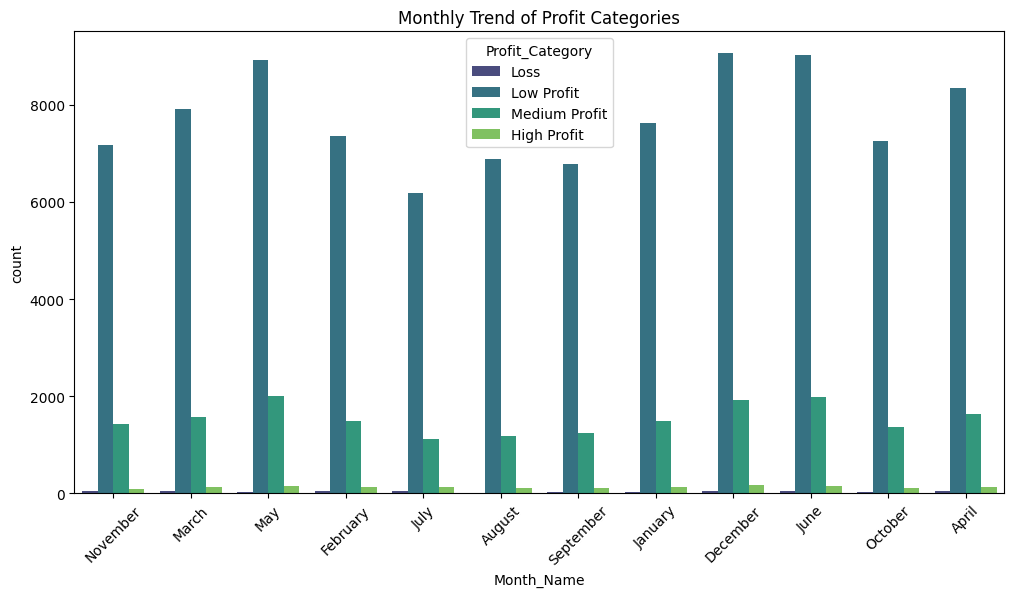

In [ ]:
sales2['Month_Name'] = sales2['Date'].dt.month_name()

plt.figure(figsize=(12,6))
sns.countplot(data=sales2, x='Month_Name', hue='Profit_Category', palette='viridis')
plt.title('Monthly Trend of Profit Categories')
plt.xticks(rotation=45)
plt.show()

In [ ]:
sales2['Month'].value_counts()

,count
Month,
June,11234
December,11200
May,11128
April,10182
March,9674
January,9284
February,9022
October,8750
November,8734


In [ ]:
#Monthly sales Trends by Revenue

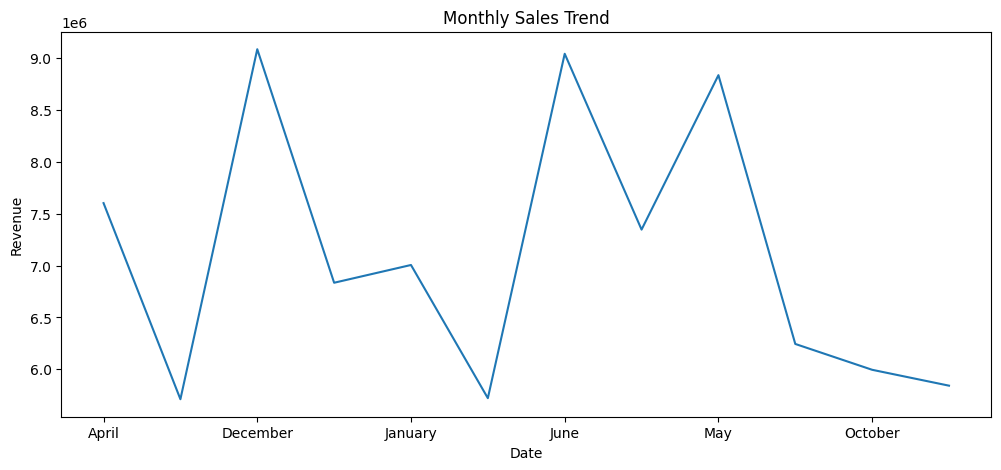

In [ ]:
sales2.groupby(sales2['Date'].dt.month_name())['Revenue'].sum().plot(kind='line', figsize=(12,5));plt.title('Monthly Sales Trend'); plt.ylabel('Revenue')
plt.show()

In [ ]:
#Monthly Sales Trends by Product_Categories

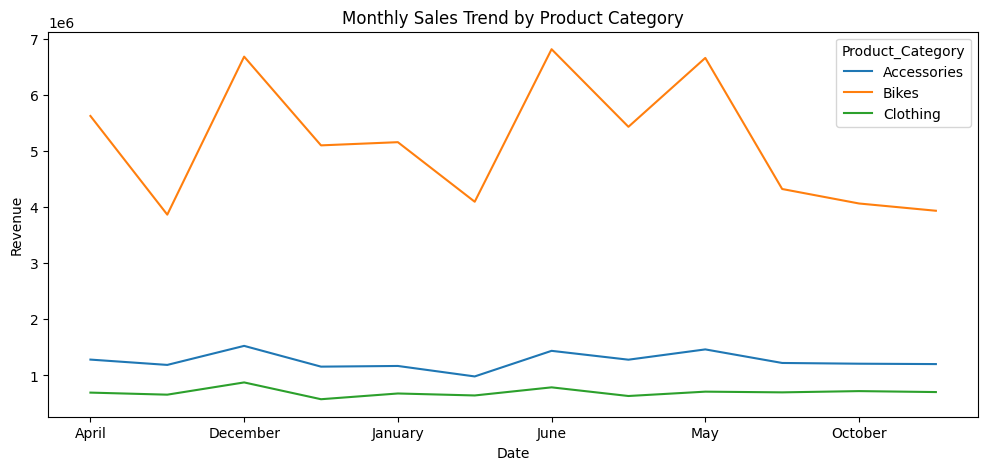

In [ ]:
monthly_trend = sales2.groupby([sales2['Date'].dt.month_name(),'Product_Category'])['Revenue'].sum().unstack()
monthly_trend.plot(kind='line', figsize=(12,5)); plt.title('Monthly Sales Trend by Product Category'); plt.ylabel('Revenue')
plt.show()


**Yearly sales trends**
1. Yearly sales value_counts
2. Yearly Revenue
3. Yearly Sales Revenue Trend by Product Category

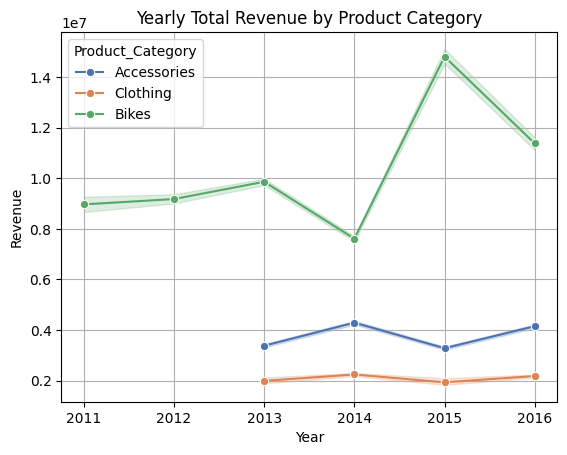

In [ ]:
sns.lineplot(data=sales2, x='Year', y='Revenue', hue='Product_Category', estimator='sum', marker='o',palette='deep'); plt.title('Yearly Total Revenue by Product Category'); plt.grid(True)
plt.show()

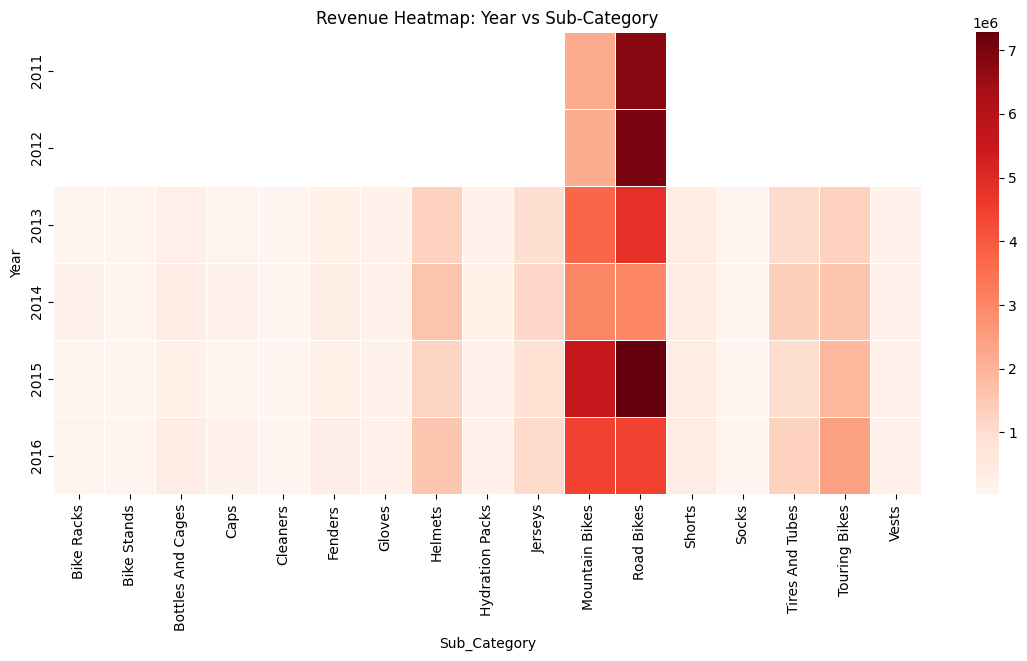

In [ ]:
pivot = sales2.groupby(['Year','Sub_Category'])['Revenue'].sum().unstack(); plt.figure(figsize=(14,6))
sns.heatmap(pivot, cmap='Reds', linewidths=0.7); plt.title('Revenue Heatmap: Year vs Sub-Category')
plt.show()

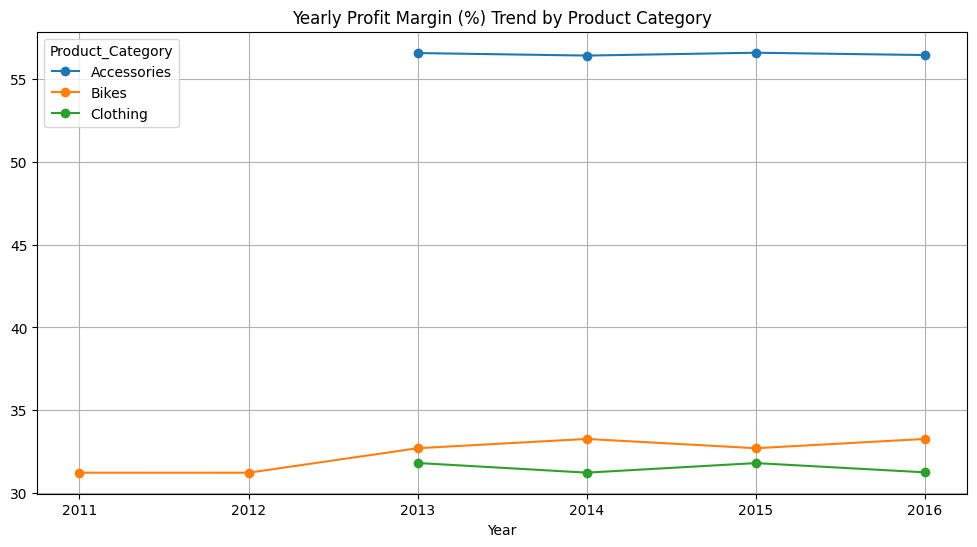

In [ ]:
sales2.groupby(['Year', 'Product_Category'])['Profit_Margin_%'].mean().unstack().plot(kind='line',marker='o', figsize=(12,6)); plt.title('Yearly Profit Margin (%) Trend by Product Category'); plt.grid(True)
plt.show()

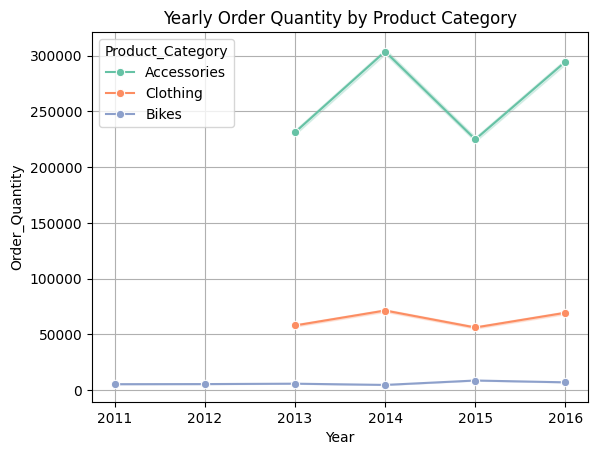

In [ ]:
sns.lineplot( data=sales2, x='Year',y='Order_Quantity', hue='Product_Category',estimator='sum',marker='o',palette='Set2'); plt.title('Yearly Order Quantity by Product Category'); plt.grid(True)
plt.show()

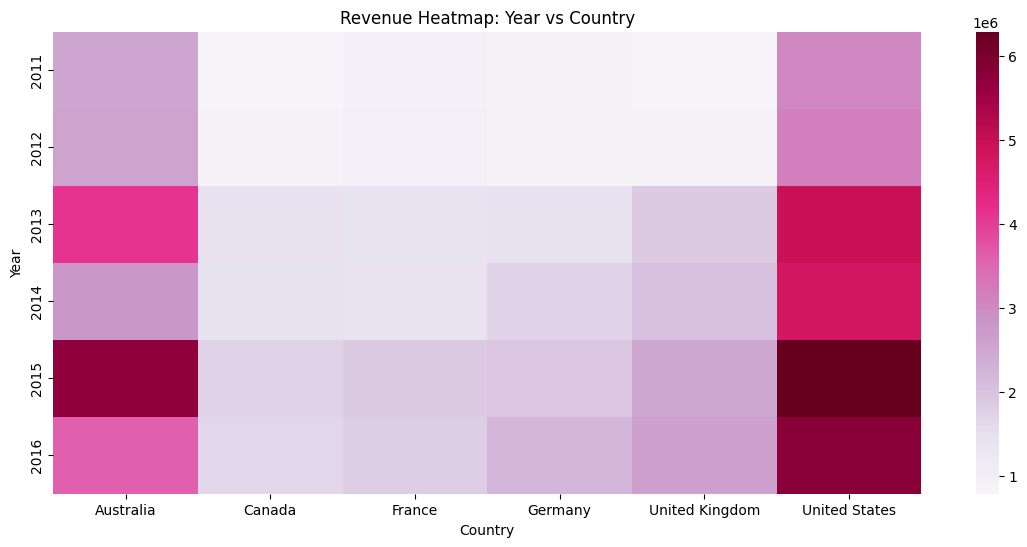

In [ ]:
pivot = sales2.groupby(['Year','Country'])['Revenue'].sum().unstack(); plt.figure(figsize=(14,6))
sns.heatmap(pivot, cmap='PuRd'); plt.title('Revenue Heatmap: Year vs Country')
plt.show()

**SALES AND REVENUE BY COUNTRY**
1. sales by country till date (value_counts)
2. Mean of order_quantity by country and show it in bar plot
3. Revenue till date per country
4. Revenue per product_categoty per country


In [ ]:
#1. sales by country till date (value_counts)


In [ ]:
sales2['Country'].value_counts().head()

,count
Country,
United States,39206
Australia,23936
Canada,14178
United Kingdom,13620
Germany,11098


In [ ]:
#2. Mean of order_quantity by country and show it in bar plot


In [ ]:
sales2.groupby('Country')['Order_Quantity'].mean()

,Order_Quantity
Country,
Australia,11.012074
Canada,13.560375
France,11.728951
Germany,11.328167
United Kingdom,11.543172
United States,12.180253


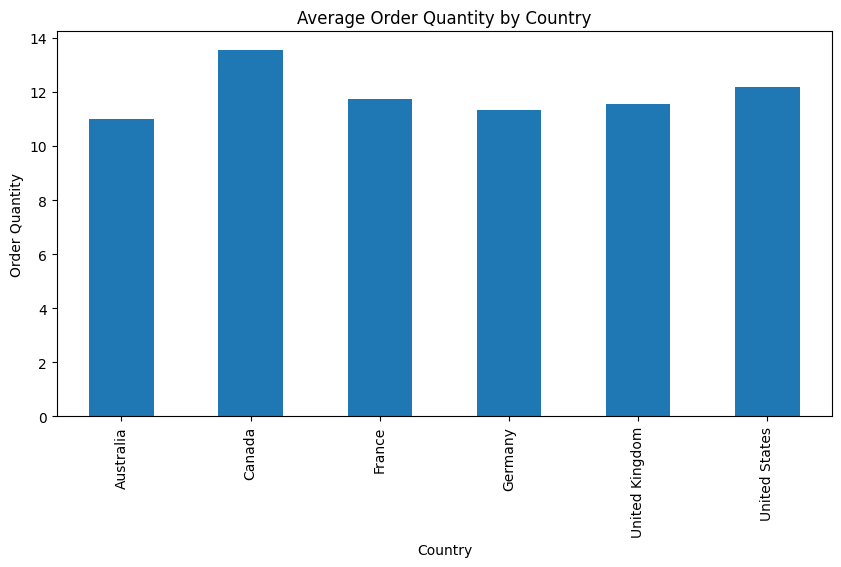

In [ ]:
sales2.groupby('Country')['Order_Quantity'].mean().plot(kind='bar', figsize=(10,5)); plt.title('Average Order Quantity by Country');plt.ylabel('Order Quantity')
plt.show()


In [ ]:
#3. Revenue till date per country


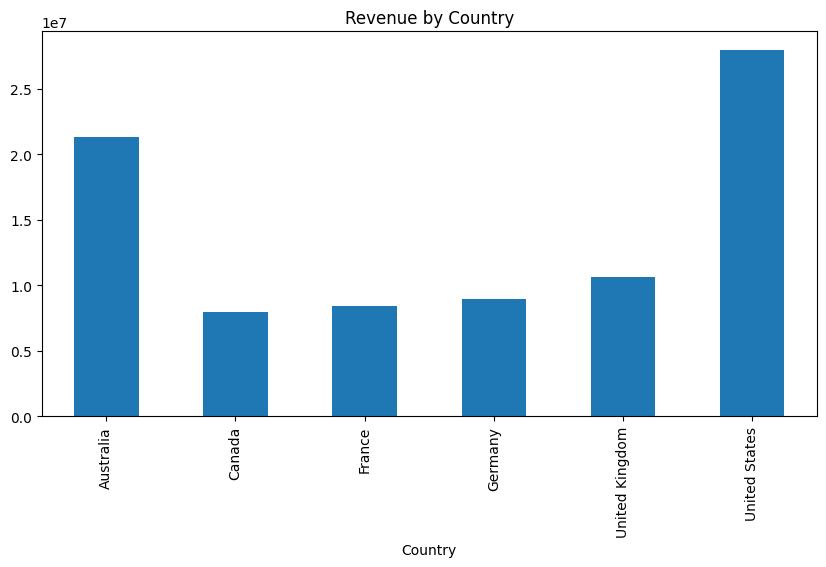

In [ ]:
sales2.groupby('Country')['Revenue'].sum().plot(kind='bar', figsize=(10,5))
plt.title('Revenue by Country')
plt.show()

In [ ]:
#4. Revenue per product_categoty per country
#“This chart compares total revenue for each product category across different countries to identify which category performs best in each region.”

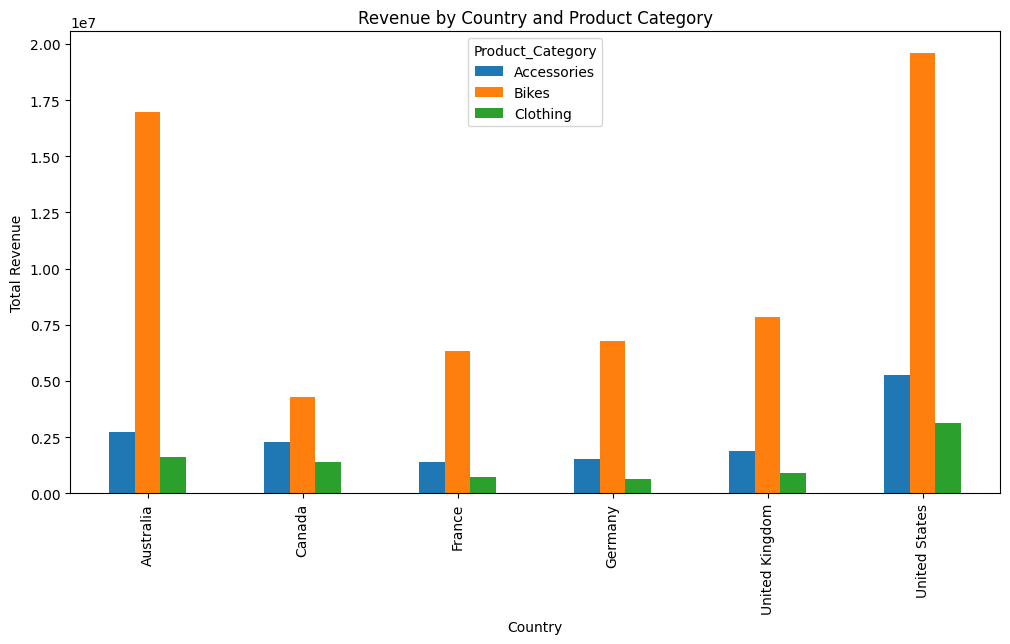

In [ ]:
country_category_rev = sales2.groupby(['Country', 'Product_Category'])['Revenue'].sum().unstack()
country_category_rev.plot(kind='bar', figsize=(12,6)); plt.title('Revenue by Country and Product Category'); plt.ylabel('Total Revenue')
plt.show()


In [ ]:
sales2['Product'].unique()

array(['Hitch Rack - 4-Bike', 'All-Purpose Bike Stand',
       'Mountain Bottle Cage', 'Water Bottle - 30 oz.',
       'Road Bottle Cage', 'AWC Logo Cap', 'Bike Wash - Dissolver',
       'Fender Set - Mountain', 'Half-Finger Gloves, L',
       'Half-Finger Gloves, M', 'Half-Finger Gloves, S',
       'Sport-100 Helmet, Black', 'Sport-100 Helmet, Red',
       'Sport-100 Helmet, Blue', 'Hydration Pack - 70 oz.',
       'Short-Sleeve Classic Jersey, XL',
       'Short-Sleeve Classic Jersey, L', 'Short-Sleeve Classic Jersey, M',
       'Short-Sleeve Classic Jersey, S', 'Long-Sleeve Logo Jersey, M',
       'Long-Sleeve Logo Jersey, XL', 'Long-Sleeve Logo Jersey, L',
       'Long-Sleeve Logo Jersey, S', 'Mountain-100 Silver, 38',
       'Mountain-100 Silver, 44', 'Mountain-100 Black, 48',
       'Mountain-100 Silver, 48', 'Mountain-100 Black, 38',
       'Mountain-200 Silver, 38', 'Mountain-100 Black, 44',
       'Mountain-100 Silver, 42', 'Mountain-200 Black, 46',
       'Mountain-200 Silver

In [ ]:
sales2['Product_Category'].unique()

array(['Accessories', 'Clothing', 'Bikes'], dtype=object)

<Axes: xlabel='Product'>

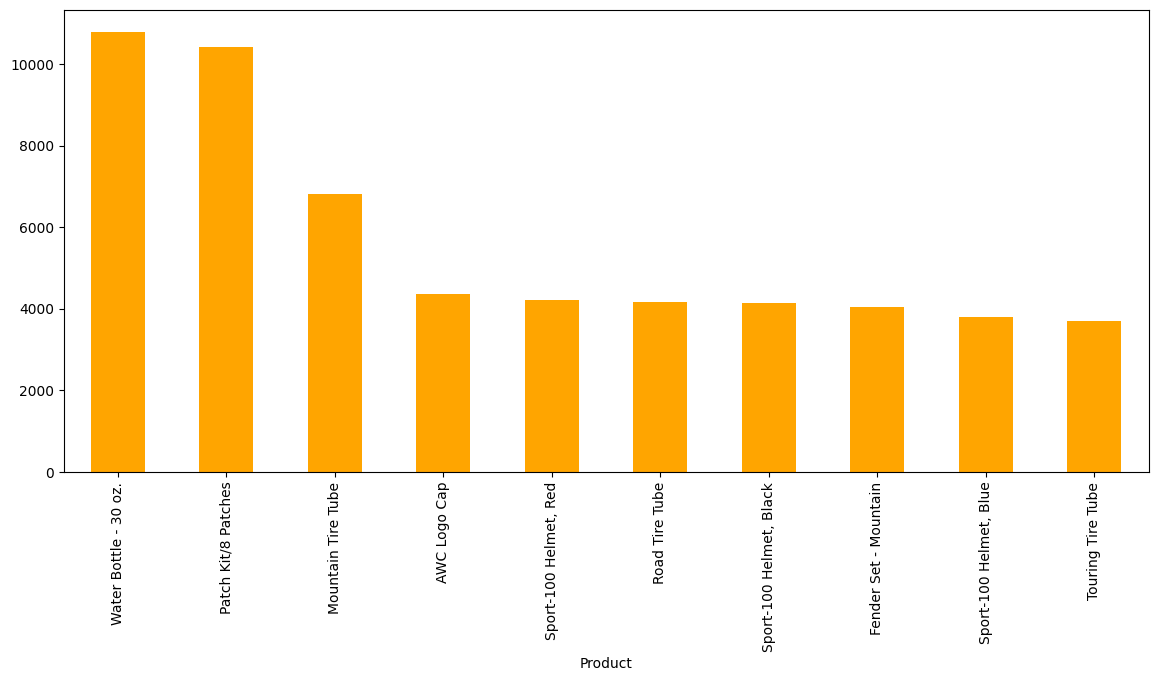

In [ ]:
sales2['Product'].value_counts().head(10).plot(kind= 'bar', color= 'orange', figsize=(14,6))

<Axes: xlabel='Unit_Cost', ylabel='Unit_Cost'>

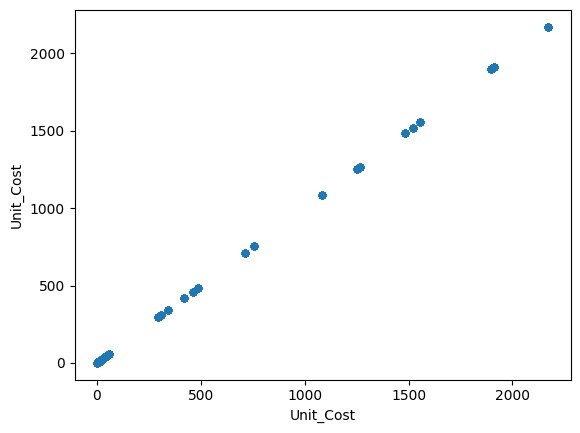

In [ ]:
sales2.plot(kind= 'scatter', x= 'Unit_Cost', y= 'Unit_Cost')

<Axes: xlabel='Order_Quantity', ylabel='Profit'>

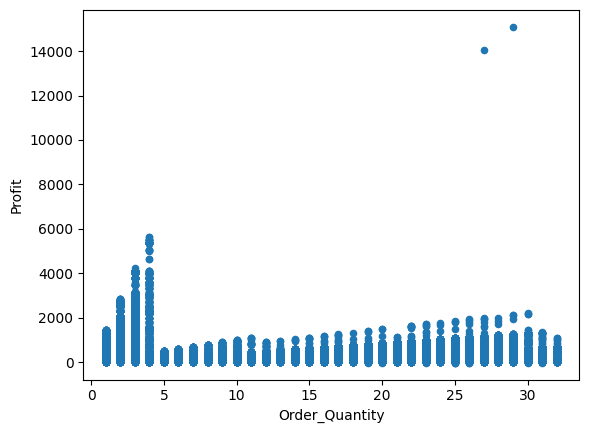

In [ ]:
sales2.plot(kind= 'scatter', x='Order_Quantity', y= 'Profit' )

<Axes: title={'center': 'Profit'}, xlabel='[Country]'>

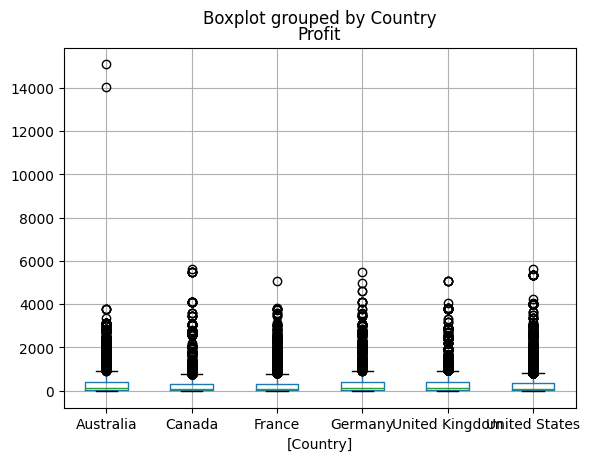

In [ ]:
sales2[['Country', 'Profit']].boxplot(by= 'Country')

<Axes: title={'center': 'Customer_Age'}, xlabel='[Country]'>

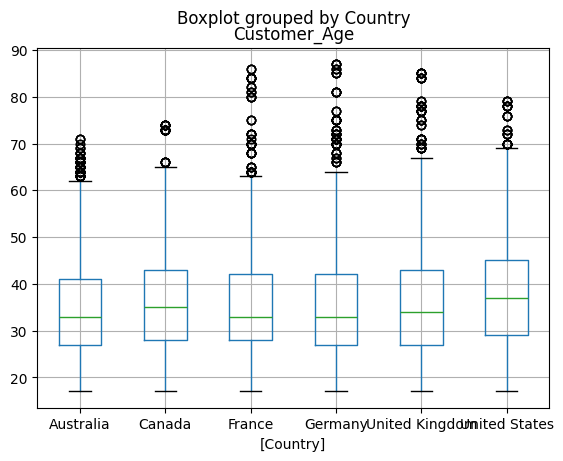

In [ ]:
sales2[['Customer_Age', 'Country']].boxplot(by= 'Country')

In [ ]:
sales2['Calculated_Dates'].dt.year



,Calculated_Dates
0,2013
1,2015
2,2014
3,2016
4,2014
...,...
113031,2016
113032,2014
113033,2016
113034,2014


<Axes: xlabel='Calculated_Dates'>

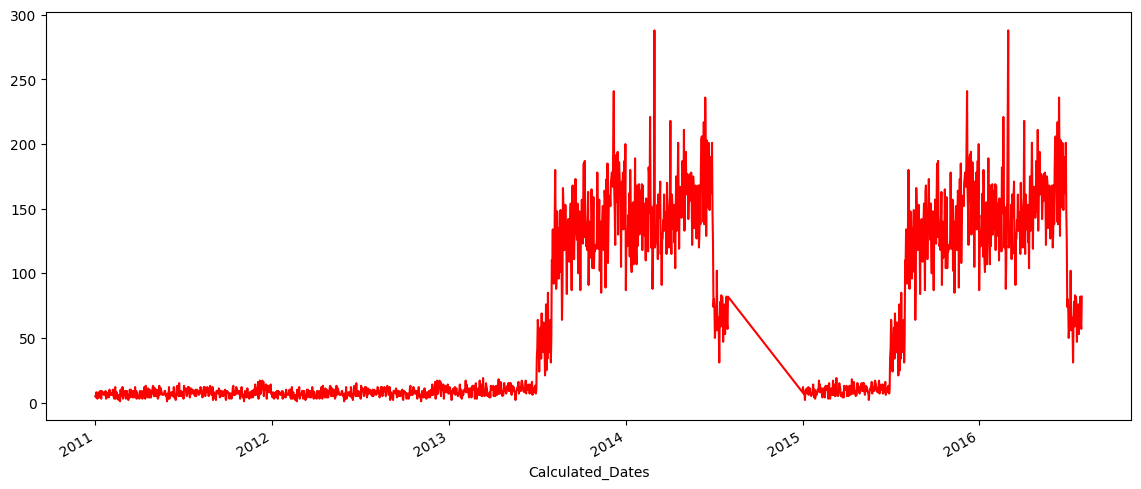

In [ ]:
sales2['Calculated_Dates'].value_counts().sort_index().plot(kind= 'line', color= 'red', figsize= (14,6))

In [ ]:
sales2['Revenue'] -=100
display(sales2['Revenue'])

,Revenue
0,850
1,850
2,2301
3,1988
4,318
...,...
113031,84
113032,1083
113033,1083
113034,1160


In [ ]:
sales2.loc[(sales2['Country']=='Canada') & (sales2['Sub_Category'] == 'Bike Racks')].shape[0]

104

In [ ]:
France_state = sales2.loc[sales2['Country'] =='France'].value_counts()
France_state


Date        Day  Month      Year  Customer_Age  Age_Group  Customer_Gender  Country  State              Product_Category  Sub_Category       Product                Order_Quantity  Unit_Cost  Unit_Price  Profit  Cost  Revenue  Calculated_Dates  Calculated_Revenue  Total_Cost  Total_Revenue  Profit_Margin_%  Profit_Category  Is_Weekend  Revenue_per_Unit  Month_Name
2016-01-06  6    January    2016  34            Young      M                France   Loiret             Accessories       Tires And Tubes    Touring Tire Tube      20              2          5           49      40    -11      2016-01-06        89                  40          100            55.056180        Low Profit       False       4.450000          January       2
2016-01-31  31   January    2016  26            Young      F                France   Seine Saint Denis  Accessories       Bottles And Cages  Water Bottle - 30 oz.  8               2          5           17      16    -67      2016-01-31        33                  16          40             51.515152        Low Profit       True        4.125000          January       2
2015-09-05  5    September  2015  26            Young      M                France   Nord               Accessories       Tires And Tubes    Road Tire Tube         2               1          4           5       2     -93      2015-09-05        7                   2           8              71.428571        Low Profit       True        3.500000          September     2
2013-08-05  5    August     2013  24            Child      F                France   Seine (Paris)      Accessories       Tires And Tubes    Patch Kit/8 Patches    25              1          2           16      25    -59      2013-08-05        41                  25          50             39.024390        Low Profit       False       1.640000          August        2
2015-11-28  28   November   2015  53            Adult      F                France   Essonne            Accessories       Tires And Tubes    Touring Tire Tube      24              2          5           67      48     15      2015-11-28        115                 48          120            58.260870        Low Profit       True        4.791667          November      2
                                                                                                                                                                                                                                                                                                                                                                                ..
2014-03-06  6    March      2014  31            Young      F                France   Seine (Paris)      Accessories       Helmets            Sport-100 Helmet, Red  20              13         35          314     260    474     2014-03-06        574                 260         700            54.703833        Low Profit       False       28.700000         March         1
                                                                                                                          Tires And Tubes    Mountain Tire Tube     11              2          5           23      22    -55      2014-03-06        45                  22          55             51.111111        Low Profit       False       4.090909          March         1
                                                                                                                                                                    21              2          5           44      42    -14      2014-03-06        86                  42          105            51.162791        Low Profit       False       4.095238          March         1
                                  33            Young      F                France   Essonne            Accessories       Helmets            Sport-100 Helmet, Red  16              13         35          330     208    438     2014-03-06        538                 208         560            61.3

In [ ]:
France_state = sales2.loc[sales2['Country'] =='France' , 'State'].value_counts()
France_state

,count
State,
Seine (Paris),2328
Seine Saint Denis,1684
Nord,1670
Hauts de Seine,1084
Essonne,994
Yveline,954
Seine et Marne,394
Moselle,386
Loiret,382


In [ ]:
sales2['State'].unique()

array(['British Columbia', 'New South Wales', 'Victoria', 'Oregon',
       'California', 'Saarland', 'Seine Saint Denis', 'Moselle',
       'Queensland', 'England', 'Nord', 'Washington', 'Hessen',
       'Nordrhein-Westfalen', 'Hamburg', 'Loir et Cher', 'Kentucky',
       'Seine (Paris)', 'South Australia', 'Loiret', 'Alberta', 'Bayern',
       'Hauts de Seine', 'Yveline', 'Essonne', "Val d'Oise", 'Tasmania',
       'Seine et Marne', 'Val de Marne', 'Pas de Calais',
       'Charente-Maritime', 'Garonne (Haute)', 'Brandenburg', 'Texas',
       'New York', 'Florida', 'Somme', 'Illinois', 'South Carolina',
       'North Carolina', 'Georgia', 'Virginia', 'Ohio', 'Ontario',
       'Wyoming', 'Missouri', 'Montana', 'Utah', 'Minnesota',
       'Mississippi', 'Massachusetts', 'Arizona', 'Alabama'], dtype=object)

In [ ]:
sales2.columns

Index(['Date', 'Day', 'Month', 'Year', 'Customer_Age', 'Age_Group',
       'Customer_Gender', 'Country', 'State', 'Product_Category',
       'Sub_Category', 'Product', 'Order_Quantity', 'Unit_Cost', 'Unit_Price',
       'Profit', 'Cost', 'Revenue', 'Calculated_Dates', 'Calculated_Revenue',
       'Total_Cost', 'Total_Revenue', 'Profit_Margin_%', 'Profit_Category',
       'Is_Weekend', 'Revenue_per_Unit', 'Month_Name'],
      dtype='object')

In [ ]:
sales2['Sub_Category'].unique()

array(['Bike Racks', 'Bike Stands', 'Bottles And Cages', 'Caps',
       'Cleaners', 'Fenders', 'Gloves', 'Helmets', 'Hydration Packs',
       'Jerseys', 'Mountain Bikes', 'Road Bikes', 'Shorts', 'Socks',
       'Tires And Tubes', 'Touring Bikes', 'Vests'], dtype=object)

In [ ]:
sales2['Product_Category'].unique()

array(['Accessories', 'Clothing', 'Bikes'], dtype=object)

In [ ]:
sales2.loc[sales2['Product_Category'] == 'Accessories', 'Sub_Category'].value_counts()

,count
Sub_Category,
Tires And Tubes,33870
Bottles And Cages,15876
Helmets,12158
Fenders,4032
Cleaners,1802
Hydration Packs,1334
Bike Racks,592
Bike Stands,456


<Axes: xlabel='Sub_Category'>

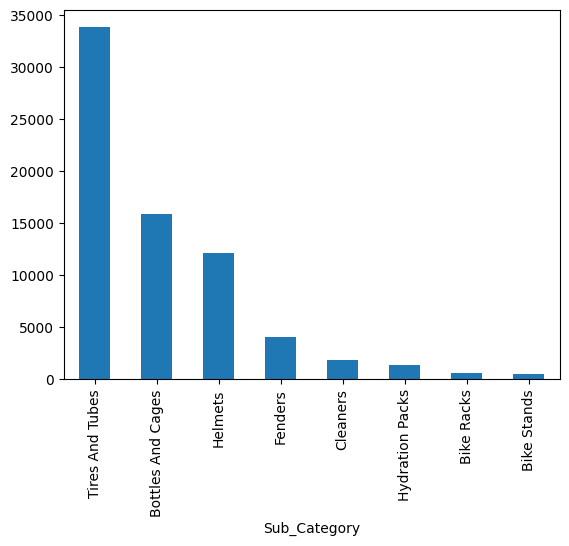

In [ ]:
sales2.loc[sales2['Product_Category'] == 'Accessories', 'Sub_Category'].value_counts().plot(kind= 'bar')

In [ ]:
sales2.loc[sales2['Product_Category'] =='Bikes', 'Sub_Category'].value_counts()

,count
Sub_Category,
Road Bikes,13430
Mountain Bikes,8854
Touring Bikes,3698


In [ ]:
sales2['Customer_Gender'].value_counts().head(1)

,count
Customer_Gender,
M,58312


<Axes: ylabel='count'>

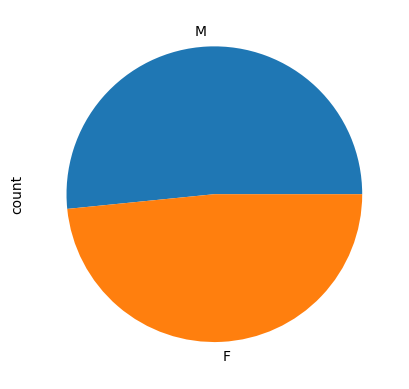

In [ ]:
sales2['Customer_Gender'].value_counts().plot(kind= 'pie')

In [ ]:
sales2.loc[(sales2['Revenue'] >= 500) | (sales2['Customer_Gender'] == 'M')].shape[0]

76099

In [ ]:
sales2.sort_values(('Revenue'), ascending= False).head(5) #sort_value

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,...,Revenue,Calculated_Dates,Calculated_Revenue,Total_Cost,Total_Revenue,Profit_Margin_%,Profit_Category,Is_Weekend,Revenue_per_Unit,Month_Name
112073,2015-07-24,24,July,2015,52,Adult,M,Australia,Queensland,Clothing,...,57974,2015-07-24,58074,42978,69136,25.994421,High Profit,False,2002.551724,July
112072,2013-07-24,24,July,2013,52,Adult,M,Australia,Queensland,Clothing,...,53969,2013-07-24,54069,40014,64368,25.994563,High Profit,False,2002.555556,July
71129,2011-07-08,8,July,2011,22,Child,M,Canada,Alberta,Bikes,...,14212,2011-07-08,14312,8684,14312,39.323644,High Profit,False,3578.000000,July
59919,2011-03-20,20,March,2011,29,Young,F,Germany,Bayern,Bikes,...,14069,2011-03-20,14169,8684,14312,38.711271,High Profit,True,3542.250000,March
68671,2011-07-05,5,July,2011,26,Young,M,Canada,British Columbia,Bikes,...,14069,2011-07-05,14169,8684,14312,38.711271,High Profit,False,3542.250000,July


In [ ]:
sales2.sort_values(('Revenue'), ascending= False).head(1) #sort_value

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,...,Revenue,Calculated_Dates,Calculated_Revenue,Total_Cost,Total_Revenue,Profit_Margin_%,Profit_Category,Is_Weekend,Revenue_per_Unit,Month_Name
112073,2015-07-24,24,July,2015,52,Adult,M,Australia,Queensland,Clothing,...,57974,2015-07-24,58074,42978,69136,25.994421,High Profit,False,2002.551724,July


In [ ]:
sales2['Customer_Gender']

,Customer_Gender
0,M
1,M
2,M
3,M
4,F
...,...
113031,M
113032,M
113033,M
113034,F


In [ ]:
sales2.loc[(sales2['Country'] =='Canada') | (sales2['Country'] == 'France')].shape[0]

25176

In [ ]:
sales2.loc[(sales2['Product'] == 'Hitch Rack - 4-Bike') & (sales2['Country'] == 'Canada')].shape[0]

104

In [ ]:
sales2.loc[sales2['Revenue'] >= 10000,'Order_Quantity'].mean()

np.float64(3.730538922155689)

In [ ]:
sales2.loc[(sales2['Year']==2016) & (sales2['Month'] == 'May')].shape[0]

5015

In [ ]:
sales2.loc[(sales2['Year'] == 2016) & (sales2['Month'].isin(['May','June','July']))].shape[0]
#isin([]) method

12164

<Axes: title={'center': 'Profit'}, xlabel='[Month]'>

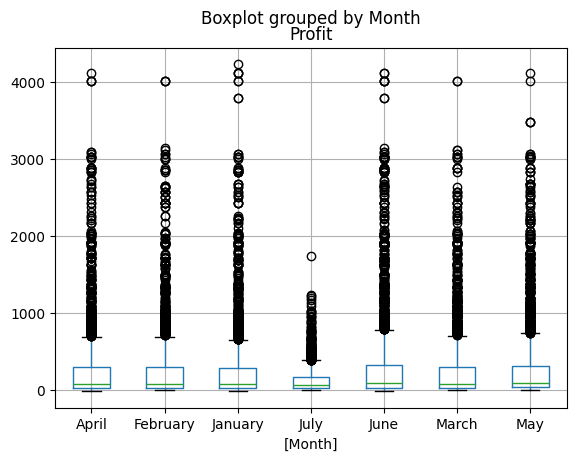

In [ ]:
sales2.loc[(sales2['Year']==2016),['Profit','Month']].boxplot(by= 'Month')

In [ ]:
sales2.loc[sales2['Country'] == 'United States', 'Unit_Price']*=1.072

/tmp/ipython-input-2067054436.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[128.64  128.64  128.64  ...  68.608  68.608  68.608]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  sales2.loc[sales2['Country'] == 'United States', 'Unit_Price']*=1.072
